In [0]:
pip install gwpy gwosc lalsuite Pycbc Pillow

In [0]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.image as mpimg
import matplotlib as mlp
import numpy as np
%matplotlib inline
import pycbc.noise
import pycbc.psd
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
ls 'gdrive/My Drive/GW data'

'labels 20.csv'              labels.csv   S+GN/           S+NGN/
'labels834_NEW - Copy.csv'   NGN/        'S+GN 01'/
 labels834_NEW.csv           NGN.csv      signal_hc.csv


#total program

In [0]:
a=np.zeros((2,5,3))
print(a)

#------------------------------------------
#         Gaussian noise
#------------------------------------------

def disp_noise(ts):
  plt.figure(figsize=(8,5))
  pylab.plot(ts.sample_times, ts)
  pylab.ylabel('Strain')
  pylab.xlabel('Time (s)')
  pylab.show()
  

#------------------------------------------------------------------------------------
#                                      main function                               #
#------------------------------------------------------------------------------------


if __name__ == '__main__':
  
  #------------------------------------------
  #                   load drive          
  #-------------------------------------------
  
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  root_dir = "/content/gdrive/My Drive/"
  base_dir = root_dir + 'fastai-v3/'

          #------------------------------------------
           #         Gaussian noise
          #------------------------------------------
  
  
  freq=4096 #frequency in Hz
  # The color of the noise matches a PSD which you provide
  flow = 30.0 #higher flow rates to higer noise amplitude 
  delta_f = 1.0 / 16
  flen = int((freq/2) / delta_f) + 1
  psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

  # Generate n seconds of noise at 4096 Hz
  n=5 #time for which data is required
  delta_t = 1 / freq #defines time step of the noise larger the time step lower will be the frequency
  tsamples = int(n/ delta_t)
  noise_hc = 5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
  noise_hp = 5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
  disp_noise(noise_hp)
  disp_noise(noise_hc)
  print(len(noise_hc),len(noise_hp))  
  
  
  
  
  
        #--------------------------------------------------------
        #         waveforms 3664 data having length of 20480
        #---------------------------------------------------------

if __name__ == '__main__':
  signal_hp=np.zeros((3664,20480))
  signal_hc=np.zeros((3664,20480))
  check=np.zeros(20480)
  k=0
  left=0
  na=[str(b) for b in np.arange(1,3664,1)]
  #labels=np.zeros((3664,5))
  apx=['TaylorT1', 'TaylorT2', 'TaylorT3', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T']

  len_apx=len(apx)
  for a in range(len_apx):
    check=np.zeros(20480)
    for m1 in range (5,80,5):
      for m2 in range (5,80,5):
        for d in range(50,1001,50):
          for fl in [30,80]:
            if (m1+m2+d+fl) not in check:

              check[k]=m1+m2+d+fl
              hp, hc = get_td_waveform(approximant=apx[a],
                               mass1=m1,mass2=m2,
                               delta_t=1.0/4096,
                               f_lower=fl,f_final=50, 
                               distance=d)
              len_hp=len(hp)
              if len_hp<=20480 or len_hp<=20480 :
                for i in range(3664):
                  for j in range(len_hp):
                    signal_hp[i][j]=noise_hp[j]+hp[j]
                    signal_hc[i][j]=noise_hc[j]+hc[j]
                  for left in range(20480-len_hp):
                    signal_hp[i][left+len_hp]=noise_hp[left+len_hp]
                    signal_hc[i][left+len_hp]=noise_hc[left+len_hp]
                  loc='gdrive/My Drive/GW data/S+GN/'+na[i]+'.png'
                  plt.figure(figsize=(8,5))
                  plt.plot(signal_hp[i])
                  plt.savefig(loc, dpi=800)
                  ##############################################################image = mpimg.imread(plt.plot(signal_hp[i]))
                print(k)
                k=k+1
                
                
    #------------------------------
    #    saving data as csv file   
    #-------------------------------

  a = np.asarray(signal_hc)
  np.savetxt("drive/My Drive/GW data/signal_hc.csv", a, delimiter=",")

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


##smaller dataset

In [0]:
#---------------------------
#len(noise_hp)=20480
#--------------------------

signal_hp=np.zeros((12,20480))
signal_hc=np.zeros((12,20480))
check=np.zeros(20480)
k=0

apx=['TaylorT1', 'TaylorT2', 'TaylorT3']
len_apx=len(apx)
for a in range(len_apx):
  check=np.zeros(20480)
  for m1 in range (10,30,10):
    for m2 in range (10,30,10):
      for d in range(100,300,100):
        for fl in [30,80]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp, hc = get_td_waveform(approximant=apx[a],
                             mass1=m1,mass2=m2,
                             delta_t=1.0/4096,
                             f_lower=fl,f_final=50, 
                             distance=d)
            if len(hp)<=20480 or len(hp)<=20480 :
              for i in range(12):                   ##--------12 is len(signal_hp)--------------------#
                for j in range(len(hp)):            ##---------len(hp) always alters--------------------#
                  signal_hp[i][j]=noise_hp[j]+hp[j]
                  signal_hc[i][j]=noise_hc[j]+hc[j]
                for left in range(20480-len(hp)):
                  signal_hp[i][left]=noise_hp[left]
                  signal_hc[i][left]=noise_hc[left]
              print(m1,m2,d,fl,len(hp),len(noise_hp))
              k=k+1

##total datasets for signal + noise



In [0]:
i=0
k=0
check=np.zeros(50000)
labels=np.zeros((3664,7))
apx=['TaylorT1', 'TaylorT2', 'TaylorT3', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv2T', 'SEOBNRv4T']
len_apx=len(apx)
for a in range(len_apx):
  check=np.zeros(20480)
  for m1 in range (5,80,5):
    for m2 in range (5,80,5):
      for d in range(50,1001,50):
        for fl in [30,80]:
          if (m1+m2+d+fl) not in check:
            labels[k]=[k,m1,m2,d,fl,50,1]
            #print(labels[k])
            check[k]=m1+m2+d+fl
            
            k+=1
            i+=1
          
print(i)

In [0]:
a = np.asarray(labels)
np.savetxt("gdrive/My Drive/GW data/labels.csv", a, delimiter=",")

In [0]:
a=[12,1,515,6,1,616]
if 2 in a:
  print(a)

In [0]:
k=0
for i in range(len(signal_hp)):
  for j in range(20480):
    print(signal_hp[i][j])

##converting to image -> tensor

In [0]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('gdrive/My Drive/GW data/1.png')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

PNG
RGBA
(6400, 4000)


In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('gdrive/My Drive/GW data/1.png')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
# example of cropping an image
from PIL import Image
# load image
image = Image.open('gdrive/My Drive/GW data/1.png')
# create a cropped image
cropped = image.crop((100, 100, 200, 200))
# show cropped image
cropped.show()


##Single data

In [0]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())

# List of fd approximants that are currently available
print(fd_approximants())

# Note that these functions only print what is available for your current
# processing context. If a waveform is implemented in CUDA or OpenCL, it will
# only be listed when running under a CUDA or OpenCL Scheme.

In [0]:
apx = ['TaylorT1']
for a in range(len(apx)):
  for fl in [40,80]:
    hp, hc = get_td_waveform(approximant=apx[a],
                             mass1=18,mass2=3,
                             #spin1x=1,spin1y=1,spin1z=1,spin2x=1,spin2y=1,spin2z=1,
                             delta_t=1.0/4096,
                             f_lower=40,                         
                             distance=500)
    disp_waveform(hp)
    print(len(hp),apx)


##saving signal values as csv file

In [0]:
apx = 'SEOBNRv4'
d1=np.zeros((20,20480))
d2=np.zeros((20,20480))
i=0
for m1 in range (5,16,5):
  for m2 in range (5,16,5):
    for d in range(100,600,200):
      if(m1!=m2):
        hp, hc = get_td_waveform(approximant=apx,
                           mass1=m1,
                           mass2=m2,
                           delta_t=1.0/4096,
                           f_lower=50,
                           f_final=50, 
                           distance=d)
        for i in range(20):
          for j in range(len(hp)):
            d1[i][j]=hp[j]
            d2[i][j]=hc[j]
            
a = numpy.asarray(d1)
numpy.savetxt("drive/My Drive/GW data/signal.csv", a, delimiter=",")

b = numpy.asarray(d2)
numpy.savetxt("drive/My Drive/GW data/signal.csv", b, delimiter=",")

#DL


In [0]:
pip install torch pandas keras

In [0]:
import pandas as pd
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

##loading labels

In [0]:
train=pd.read_csv('gdrive/My Drive/GW data/labels834_NEW - Copy.csv')

In [0]:
train.shape

(1000, 7)

In [0]:
print(train.head(),train.tail(),train.columns)

   file   m1   m2      d    fl    ff  event
0   1.0  5.0  5.0   50.0  30.0  50.0    1.0
1   2.0  5.0  5.0   50.0  80.0  50.0    1.0
2   3.0  5.0  5.0  100.0  80.0  50.0    1.0
3   4.0  5.0  5.0  150.0  80.0  50.0    1.0
4   5.0  5.0  5.0  200.0  80.0  50.0    1.0        file   m1   m2    d   fl   ff  event
995   996.0  0.0  0.0  0.0  0.0  0.0    0.0
996   997.0  0.0  0.0  0.0  0.0  0.0    0.0
997   998.0  0.0  0.0  0.0  0.0  0.0    0.0
998   999.0  0.0  0.0  0.0  0.0  0.0    0.0
999  1000.0  0.0  0.0  0.0  0.0  0.0    0.0 Index(['file', 'm1', 'm2', 'd', 'fl', 'ff', 'event'], dtype='object')


##loading and preprocessing the data

In [0]:
train_image = []
na=[str(b) for b in np.arange(1,1001,1)]
for i in tqdm(range(train.shape[0])):
  loc='gdrive/My Drive/GW data/S+GN/'+na[i]+'.png'
  img = image.load_img(loc,target_size=(400,400,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
X = np.array(train_image)

100%|██████████| 1000/1000 [12:23<00:00,  1.46it/s]


In [0]:
X.shape

(1000, 400, 400, 3)

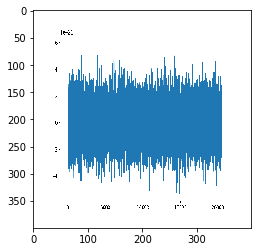

In [0]:
plt.imshow(X[2])

In [0]:
y = np.array(train.drop(['file'],axis=1))
y.shape

(1000, 6)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(900, 400, 400, 3) (100, 400, 400, 3) (900, 6) (100, 6)


##USING KERAS


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 93, 93, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)

Train on 900 samples, validate on 100 samples
Epoch 1/50
900/900 [==============================] - 4s 4ms/step - loss: -904.1891 - acc: 0.0965 - val_loss: -917.2983 - val_acc: 0.0800
Epoch 2/50
900/900 [==============================] - 4s 4ms/step - loss: -877.9390 - acc: 0.0946 - val_loss: -917.3904 - val_acc: 0.0867
Epoch 3/50
900/900 [==============================] - 4s 4ms/step - loss: -868.1235 - acc: 0.0887 - val_loss: -917.3904 - val_acc: 0.0867
Epoch 4/50
900/900 [==============================] - 4s 4ms/step - loss: -895.7088 - acc: 0.0904 - val_loss: -917.2983 - val_acc: 0.0800
Epoch 5/50
900/900 [==============================] - 4s 4ms/step - loss: -888.3427 - acc: 0.0948 - val_loss: -917.3904 - val_acc: 0.0867
Epoch 6/50
900/900 [==============================] - 4s 4ms/step - loss: -855.5059 - acc: 0.0996 - val_loss: -917.3904 - val_acc: 0.0867
Epoch 7/50
900/900 [==============================] - 4s 4ms/step - loss: -886.0376 - acc: 0.0983 - val_loss: -917.3904 - val_

##USING PYTORCH

In [0]:
import torch
import torch.nn as nn

In [0]:
class Unit(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(Unit,self).__init__()
        

        self.conv = nn.Conv2d(in_channels=in_channels,kernel_size=3,out_channels=out_channels,stride=1,padding=1)
        self.bn = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU()

    def forward(self,input):
        output = self.conv(input)
        output = self.bn(output)
        output = self.relu(output)

        return output

class SimpleNet(nn.Module):
    def __init__(self,num_classes=6):
        super(SimpleNet,self).__init__()
        
        #Create 14 layers of the unit with max pooling in between
        self.unit1 = Unit(in_channels=3,out_channels=32)
        self.unit2 = Unit(in_channels=32, out_channels=32)
        self.unit3 = Unit(in_channels=32, out_channels=32)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit4 = Unit(in_channels=32, out_channels=64)
        self.unit5 = Unit(in_channels=64, out_channels=64)
        self.unit6 = Unit(in_channels=64, out_channels=64)
        self.unit7 = Unit(in_channels=64, out_channels=64)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit8 = Unit(in_channels=64, out_channels=128)
        self.unit9 = Unit(in_channels=128, out_channels=128)
        self.unit10 = Unit(in_channels=128, out_channels=128)
        self.unit11 = Unit(in_channels=128, out_channels=128)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit12 = Unit(in_channels=128, out_channels=128)
        self.unit13 = Unit(in_channels=128, out_channels=128)
        self.unit14 = Unit(in_channels=128, out_channels=128)

        self.avgpool = nn.AvgPool2d(kernel_size=4)
        
        #Add all the units into the Sequential layer in exact order
        self.net = nn.Sequential(self.unit1, self.unit2, self.unit3, self.pool1, self.unit4, self.unit5, self.unit6
                                 ,self.unit7, self.pool2, self.unit8, self.unit9, self.unit10, self.unit11, self.pool3,
                                 self.unit12, self.unit13, self.unit14, self.avgpool)

        self.fc = nn.Linear(in_features=128,out_features=num_classes)

    def forward(self, input):
        output = self.net(input)
        output = output.view(-1,128)
        output = self.fc(output)
        return output

In [0]:
from torch.optim import Adam


# Check if gpu support is available
cuda_avail = torch.cuda.is_available()

# Create model, optimizer and loss function
model = SimpleNet(num_classes=10)

#if cuda is available, move the model to the GPU
if cuda_avail:
    model.cuda()

#Define the optimizer and loss function
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_fn = nn.CrossEntropyLoss()

In [0]:
def adjust_learning_rate(epoch):
    lr = 0.001

    if epoch > 180:
        lr = lr / 1000000
    elif epoch > 150:
        lr = lr / 100000
    elif epoch > 120:
        lr = lr / 10000
    elif epoch > 90:
        lr = lr / 1000
    elif epoch > 60:
        lr = lr / 100
    elif epoch > 30:
        lr = lr / 10

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

In [0]:
def save_models(epoch):
    torch.save(model.state_dict(), "cifar10model_{}.model".format(epoch))
    print("Chekcpoint saved")

In [0]:
def train(num_epochs):
    best_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_acc = 0.0
        train_loss = 0.0
        for i, (images, labels) in range(len(X)):
            # Move images and labels to gpu if available
            if cuda_avail:
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            # Clear all accumulated gradients
            optimizer.zero_grad()
            # Predict classes using images from the test set
            outputs = model(images)
            # Compute the loss based on the predictions and actual labels
            loss = loss_fn(outputs, labels)
            # Backpropagate the loss
            loss.backward()

            # Adjust parameters according to the computed gradients
            optimizer.step()

            train_loss += loss.cpu().data[0] * images.size(0)
            _, prediction = torch.max(outputs.data, 1)
            
            train_acc += torch.sum(prediction == labels.data)

        # Call the learning rate adjustment function
        adjust_learning_rate(epoch)

        # Compute the average acc and loss over all 50000 training images
        train_acc = train_acc / 50000
        train_loss = train_loss / 50000

        # Evaluate on the test set
        test_acc = test()

        # Save the model if the test acc is greater than our current best
        if test_acc > best_acc:
            save_models(epoch)
            best_acc = test_acc

        # Print the metrics
        print("Epoch {}, Train Accuracy: {} , TrainLoss: {} , Test Accuracy: {}".format(epoch, train_acc, train_loss,test_acc))
                        

In [0]:
def test():
    model.eval()
    test_acc = 0.0
    for i, (images, labels) in range(len(X)):

        if cuda_avail:
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        # Predict classes using images from the test set
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        
        test_acc += torch.sum(prediction == labels.data)

    # Compute the average acc and loss over all 10000 test images
    test_acc = test_acc / 10000

    return test_acc

In [0]:
if __name__ == "__main__":
    train(10)